In [1]:
#importing libraies

import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#importing dataset

data_source = 'yahoo'
start_date = '2013-01-01'
end_date = '2022-08-09'
sp_500 = data.DataReader('VFV.TO', data_source, start_date, end_date) #reads the data directly from source. No need to download it.

In [3]:
sp_500.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-03,94.989998,93.820000,94.269997,94.750000,87400.0,94.750000
2022-08-04,95.000000,94.480003,94.879997,94.800003,111800.0,94.800003
2022-08-05,95.300003,94.570000,94.699997,95.169998,89100.0,95.169998
2022-08-08,95.500000,94.349998,95.099998,94.559998,200800.0,94.559998
2022-08-09,94.470001,94.129997,94.440002,94.279999,66400.0,94.279999


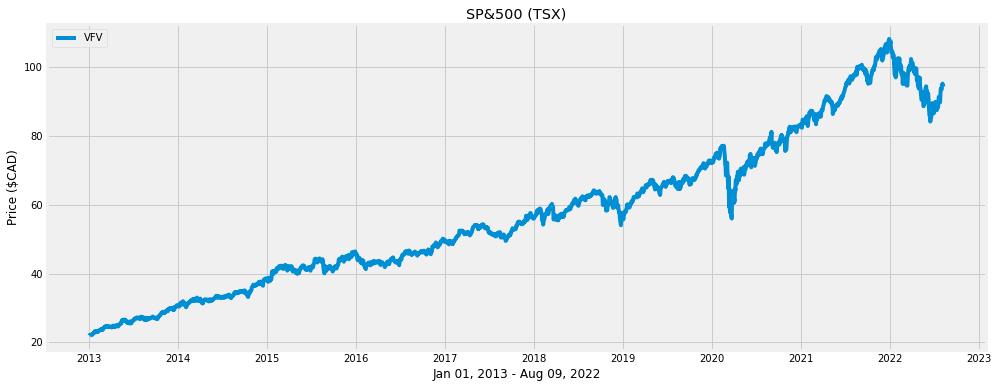

In [5]:
#plotting dataset with matplotlib 

plt.figure(figsize=(15,6))
plt.plot(sp_500['Adj Close'], label = 'VFV')
plt.title('SP&500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

In [6]:
#creating the exponential moving average(EMA) of 30 days. 
#I decided to use EMA over simple moving average because EMA put more weight on recent days.

EMA30 = pd.DataFrame()
EMA30['Close'] = sp_500['Adj Close'].ewm(span=30, adjust=False).mean()
EMA30.tail()

,Close
Date,
2022-08-03,90.482527
2022-08-04,90.761074
2022-08-05,91.045521
2022-08-08,91.272261
2022-08-09,91.466309


In [7]:
EMA100 = pd.DataFrame()
EMA100['Close'] = sp_500['Adj Close'].ewm(span=100, adjust=False).mean()
EMA100.tail()

,Close
Date,
2022-08-03,92.506602
2022-08-04,92.552016
2022-08-05,92.603857
2022-08-08,92.642592
2022-08-09,92.675016


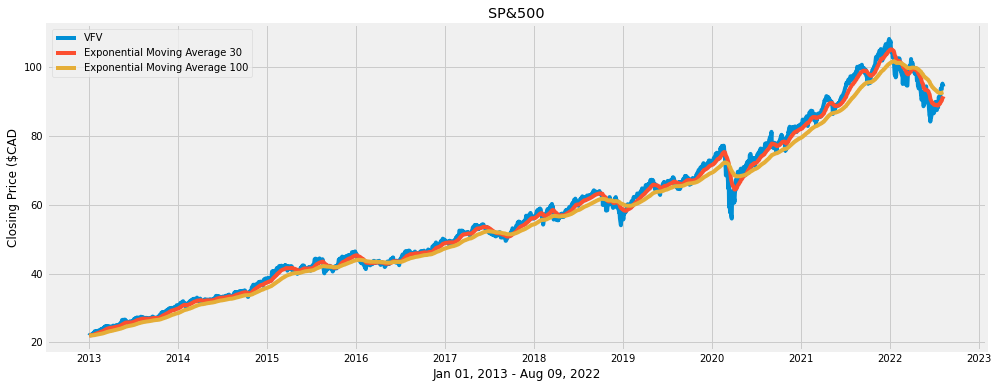

In [8]:
#plotting the S&P500 with the EMA30 & 100.

plt.figure(figsize=(15,6))
plt.plot(sp_500['Adj Close'], label = 'VFV') #I decided to use Adj Close price becasue it factors in anything that might affect the stock price after the market closes, like: dividens, splits, etc. 
plt.plot(EMA30['Close'], label = 'Exponential Moving Average 30')
plt.plot(EMA100['Close'], label = 'Exponential Moving Average 100')
plt.title('SP&500')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Closing Price ($CAD')
plt.legend(loc = 'upper left')
plt.show()

In [9]:
#combining everything into new dataset.

data = pd.DataFrame()
data['SP500'] = sp_500['Adj Close']
data['EMA30'] = EMA30['Close']
data['EMA100'] = EMA100['Close']
data.tail()

,SP500,EMA30,EMA100
Date,,,
2022-08-03,94.750000,90.482527,92.506602
2022-08-04,94.800003,90.761074,92.552016
2022-08-05,95.169998,91.045521,92.603857
2022-08-08,94.559998,91.272261,92.642592
2022-08-09,94.279999,91.466309,92.675016


In [10]:
def signal(data):
    buy = []
    sell = []
    condition = 0
    
    for day in range(len(data)):
        
        if data['EMA30'][day] > data['EMA100'][day]:    #buying when EMA30 cross EMA100 from down to top
            if condition != 1:
                buy.append(data['SP500'][day])
                sell.append(np.nan)
                condition = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
            
        elif data['EMA30'][day] < data['EMA100'][day]:  #selling when EMA30 cross EMA100 from top to bottom
            if condition != -1:
                sell.append(data['SP500'][day])
                buy.append(np.nan)
                condition = -1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell) 

In [ ]:
signals = signal (data)
data['buy'] = signals[0]
data['sell'] = signals[1]
data

,SP500,EMA30,EMA100,buy,sell
Date,,,,,
2013-01-02,22.008450,22.008450,22.008450,NaN,NaN
2013-01-03,22.129850,22.016282,22.010854,22.12985,NaN
2013-01-04,22.181883,22.026966,22.014240,NaN,NaN
2013-01-07,22.147196,22.034723,22.016873,NaN,NaN
2013-01-08,22.069155,22.036944,22.017908,NaN,NaN
...,...,...,...,...,...
2022-08-03,94.750000,90.482527,92.506602,NaN,NaN
2022-08-04,94.800003,90.761074,92.552016,NaN,NaN
2022-08-05,95.169998,91.045521,92.603857,NaN,NaN


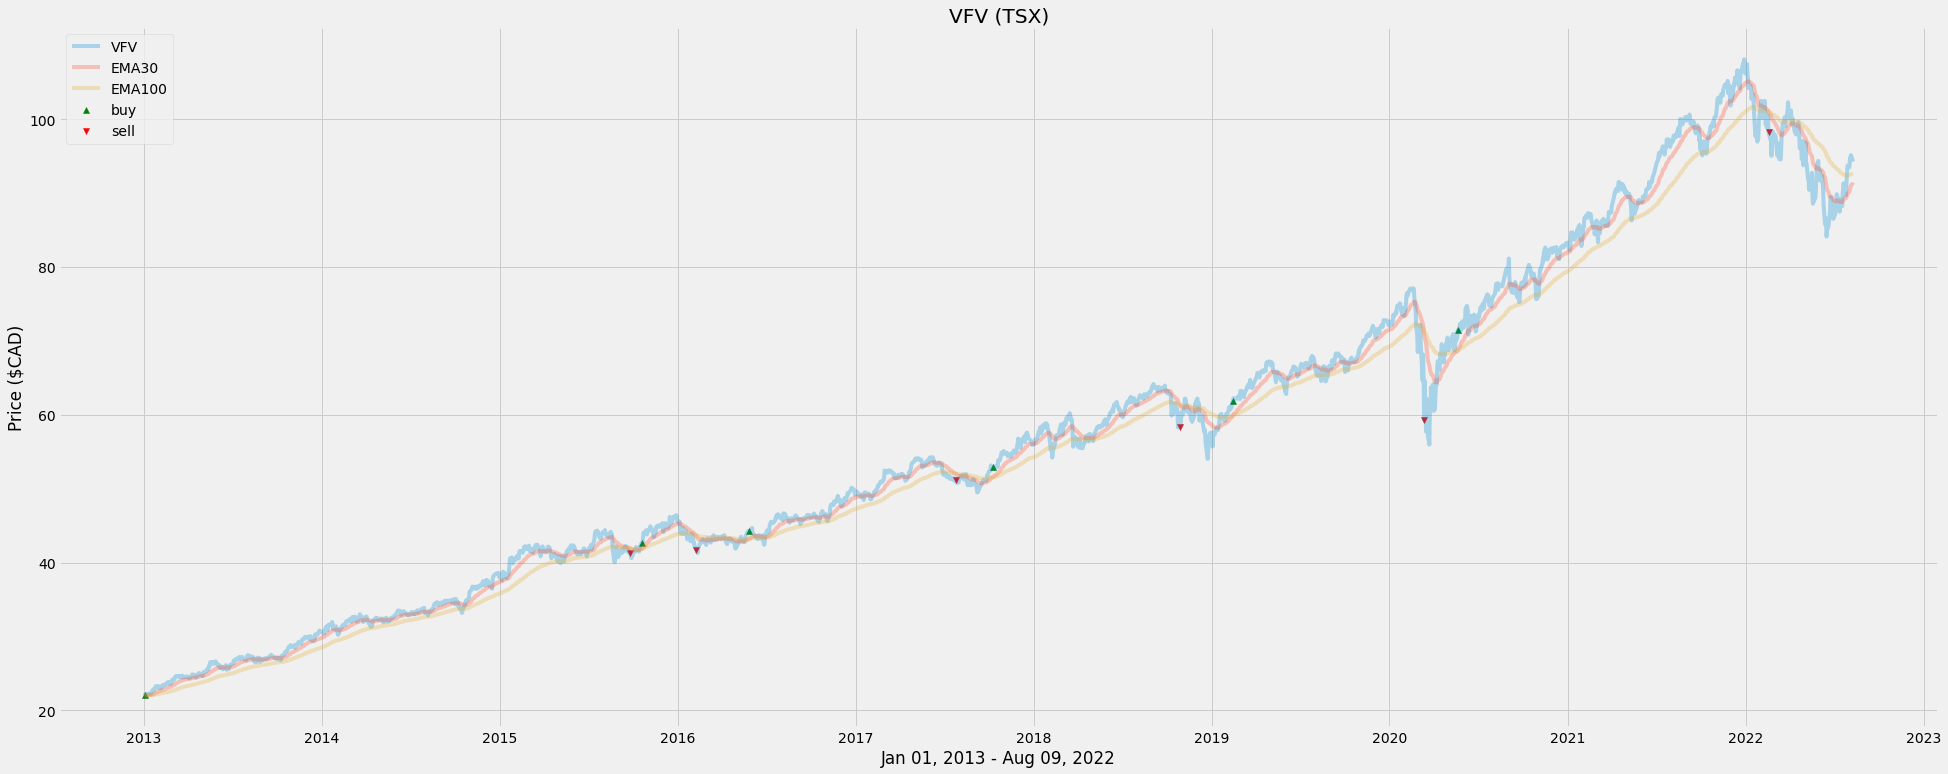

In [68]:
plt.figure(figsize = (30, 12))
plt.plot(data['SP500'], label = 'VFV', alpha = 0.3)
plt.plot(data['EMA30'], label = 'EMA30', alpha = 0.3)
plt.plot(data['EMA100'], label = 'EMA100', alpha = 0.3)
plt.scatter(data.index, data['buy'], label = 'buy', marker = '^', color = 'green')
plt.scatter(data.index, data['sell'], label = 'sell', marker = 'v', color = 'red')
plt.title('S&P 500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

## Insights
* The buying signal appears to be effective. Selling not so much. 
* It is also important to consider when to exit a trade. (Need to work on that). 
* A stop loss must be set large enough for the trade to be successful.